In [1]:
# third party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# make it pretty
plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv('../data/daily_temp_ts.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df.head()

,date,temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
date    3650 non-null datetime64[ns]
temp    3650 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [6]:
m, b = np.polyfit(x=df.index, y=df['temp'], deg=1)

In [7]:
df['detrended_temp'] = df['temp'] - (df.index * m + b)

In [8]:
dtt = df['detrended_temp']
df['detrended_scaled_temp'] = (dtt - dtt.min()) / (dtt.max() - dtt.min())

In [9]:
df.head()

,date,temp,detrended_temp,detrended_scaled_temp
0,1981-01-01,20.7,9.608113,0.788005
1,1981-01-02,17.9,6.808066,0.681639
2,1981-01-03,18.8,7.708018,0.715825
3,1981-01-04,14.6,3.507971,0.556277
4,1981-01-05,15.8,4.707924,0.601860


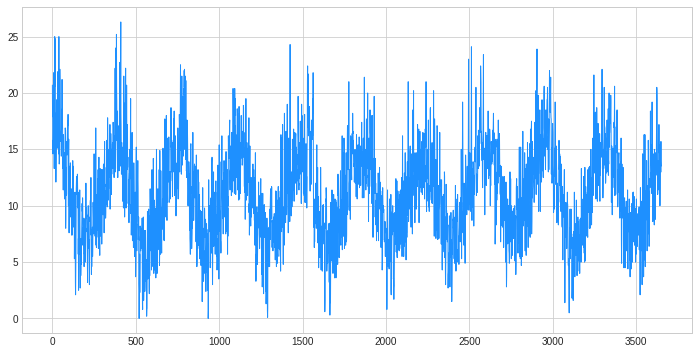

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(
    df.index,
    df['temp'],
    linewidth=1,
    color='dodgerblue'
);

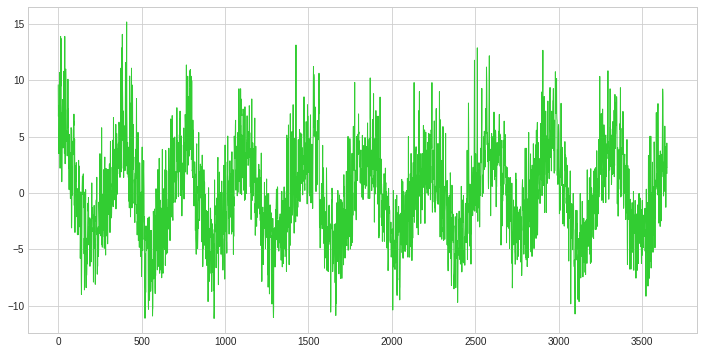

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(
    df.index,
    df['detrended_temp'],
    linewidth=1,  
    color='limegreen',
);

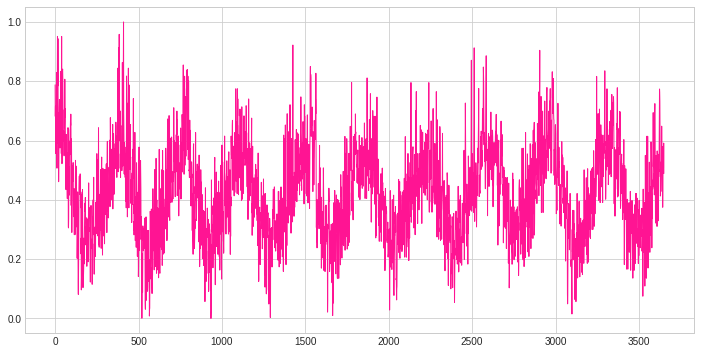

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(
    df.index,
    df['detrended_scaled_temp'],
    linewidth=1,
    color='deeppink',
);

In [13]:
df.to_csv(
    '../data/prep_daily_temp_ts.csv',
    index=False,
    header=True,
)

In [14]:
detrend_scale_data = pd.DataFrame(
    data=[[m, b, dtt.min(), dtt.max()]], 
    columns=['slope', 'intecept', 'detrended_min', 'detrended_max'])
detrend_scale_data

,slope,intecept,detrended_min,detrended_max
0,0.000047,11.091887,-11.135844,15.188817


In [15]:
detrend_scale_data.to_csv(
    '../data/detrend_scale_data.csv',
    header=True,
    index=False,
)